### Step 1 - Importing the requried libraries

In [29]:
# imports for the dataset and building our neural network
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import seaborn as sns 

'''
TensorFlow (import tensorflow as tf): Provides tools for building and training neural networks.

NumPy (import numpy as np): Supports numerical computations with multi-dimensional arrays.

Pandas (import pandas as pd): Facilitates data manipulation and analysis with DataFrames.

Keras (from tensorflow import keras): Simplifies building and training neural networks.

CIFAR-10 Dataset (from keras.datasets import cifar10): Provides a dataset of 60,000 32x32 color images for training.

Sequential Model (from keras.models import Sequential): Allows building neural networks layer by layer.

Layers (from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten):
        Dense: Adds a fully connected layer.
        Dropout: Helps prevent overfitting by randomly dropping units.
        Conv2D: Adds a 2D convolutional layer for image processing.
        MaxPool2D: Reduces spatial dimensions with max pooling.
        Flatten: Converts input into a 1D array.
        
Matplotlib (import matplotlib.pyplot as plt): Creates static, animated, and interactive visualizations.

Seaborn (import seaborn as sns): Enhances Matplotlib with additional statistical plotting.

'''

'\nTensorFlow (import tensorflow as tf): Provides tools for building and training neural networks.\n\nNumPy (import numpy as np): Supports numerical computations with multi-dimensional arrays.\n\nPandas (import pandas as pd): Facilitates data manipulation and analysis with DataFrames.\n\nKeras (from tensorflow import keras): Simplifies building and training neural networks.\n\nCIFAR-10 Dataset (from keras.datasets import cifar10): Provides a dataset of 60,000 32x32 color images for training.\n\nSequential Model (from keras.models import Sequential): Allows building neural networks layer by layer.\n\nLayers (from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten):\n        Dense: Adds a fully connected layer.\n        Dropout: Helps prevent overfitting by randomly dropping units.\n        Conv2D: Adds a 2D convolutional layer for image processing.\n        MaxPool2D: Reduces spatial dimensions with max pooling.\n        Flatten: Converts input into a 1D array.\n        \nMa

### Step 2- Load and Explore the dataset

In [30]:
# loading the dataset
# dataset details can be found at https://www.cs.toronto.edu/~kriz/cifar.html
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [31]:
len(X_train)

50000

In [32]:
len(X_test)

10000

In [33]:
X_train.shape

(50000, 32, 32, 3)

The shape (50000, 32, 32, 3) in the CIFAR-10 dataset represents:

50000: The number of images in the dataset.
32, 32: The height and width of each image in pixels.
3: The number of color channels (Red, Green, Blue) in each image.
So, this shape indicates that the dataset contains 50,000 images, each of size 32x32 pixels with 3 color channels.

Is there anything specific you’d like to know about working with this dataset?

In [34]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [35]:
X_train[0].shape

(32, 32, 3)

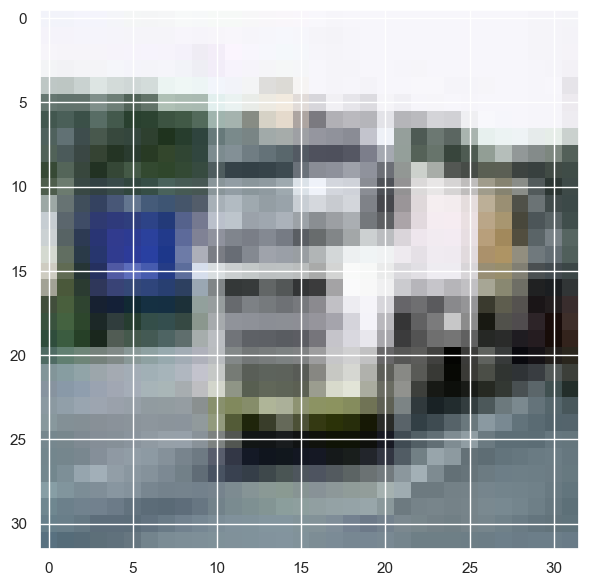

In [36]:
plt.imshow(X_train[1000]) #RGB---BGR

In [37]:
y_train[0]

array([6], dtype=uint8)

### Step 3- Preprocessing

In [38]:
# # building the input vector from the 32x32 pixels  we are creating a 3D array of the dataset 
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

'''
! The data might already be in the shape (50000, 32, 32, 3) if it was loaded correctly from the CIFAR-10 dataset.
However, sometimes datasets can be loaded in a flattened format or in a different shape, 
especially if they were preprocessed or saved differently.

The reshape step ensures that the data is in the correct format for the neural network, 
regardless of its initial shape. It’s a good practice to explicitly reshape the data to avoid any issues during model training.
'''

'\n! The data might already be in the shape (50000, 32, 32, 3) if it was loaded correctly from the CIFAR-10 dataset.\nHowever, sometimes datasets can be loaded in a flattened format or in a different shape, \nespecially if they were preprocessed or saved differently.\n\nThe reshape step ensures that the data is in the correct format for the neural network, \nregardless of its initial shape. It’s a good practice to explicitly reshape the data to avoid any issues during model training.\n'

In [39]:
# normalizing the data to help with the training
X_train =X_train/ 255
X_test =X_test/ 255

### Step 4- Building the Model

In [40]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [41]:
# convolutional layer 1

model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
'''
--Conv2D: Adds a 2D convolutional layer to the model.
--filters=16: Specifies the number of filters (16) in the convolutional layer.
--kernel_size=(5,5): Defines the size of the convolutional kernel (5x5).
--strides=(1,1): Sets the stride of the convolution (1 pixel at a time in both height and width).
--padding='same': Ensures the output has the same width and height as the input by padding the input.
--activation='relu': Applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity.
--input_shape=(32, 32, 3): Specifies the shape of the input data (32x32 pixels with 3 color channels).

This layer is responsible for detecting features in the input images by applying 16 different 5x5 filters 
across the entire image, with the ReLU activation function adding non-linearity to the model.
'''


C:\Users\seglu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"\n--Conv2D: Adds a 2D convolutional layer to the model.\n--filters=16: Specifies the number of filters (16) in the convolutional layer.\n--kernel_size=(5,5): Defines the size of the convolutional kernel (5x5).\n--strides=(1,1): Sets the stride of the convolution (1 pixel at a time in both height and width).\n--padding='same': Ensures the output has the same width and height as the input by padding the input.\n--activation='relu': Applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity.\n--input_shape=(32, 32, 3): Specifies the shape of the input data (32x32 pixels with 3 color channels).\n\nThis layer is responsible for detecting features in the input images by applying 16 different 5x5 filters \nacross the entire image, with the ReLU activation function adding non-linearity to the model.\n"

In [42]:
# convolutional layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
'''
--Conv2D: Adds a 2D convolutional layer to the model.
--filters=32: Specifies the number of filters (32) in the convolutional layer.
--kernel_size=(3,3): Defines the size of the convolutional kernel (3x3).
--strides=1: Sets the stride of the convolution to 1 pixel at a time in both height and width.
--padding='valid': No padding is added, so the output dimensions will be smaller than the input dimensions.
--activation='relu': Applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity.

This layer will apply 32 different 3x3 filters across the input, detecting more complex features compared 
to the previous layer, and the ReLU activation function will help the model learn non-linear patterns.
'''

"\n--Conv2D: Adds a 2D convolutional layer to the model.\n--filters=32: Specifies the number of filters (32) in the convolutional layer.\n--kernel_size=(3,3): Defines the size of the convolutional kernel (3x3).\n--strides=1: Sets the stride of the convolution to 1 pixel at a time in both height and width.\n--padding='valid': No padding is added, so the output dimensions will be smaller than the input dimensions.\n--activation='relu': Applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity.\n\nThis layer will apply 32 different 3x3 filters across the input, detecting more complex features compared \nto the previous layer, and the ReLU activation function will help the model learn non-linear patterns.\n"

In [43]:
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

'''
--MaxPool2D: Adds a 2D max pooling layer to the model.
--pool_size=(2,2): Specifies the size of the pooling window (2x2).

Purpose:
Reduces Spatial Dimensions: The 2x2 pooling window slides over the input, taking the maximum value in each window, 
effectively reducing the spatial dimensions by half.

Downsamples the Input: This helps in reducing the computational load and the number of parameters, 
making the model more efficient.

Retains Important Features: By taking the maximum value, it retains the most prominent features detected by 
the previous convolutional layers.
'''

'\n--MaxPool2D: Adds a 2D max pooling layer to the model.\n--pool_size=(2,2): Specifies the size of the pooling window (2x2).\n\nPurpose:\nReduces Spatial Dimensions: The 2x2 pooling window slides over the input, taking the maximum value in each window, \neffectively reducing the spatial dimensions by half.\n\nDownsamples the Input: This helps in reducing the computational load and the number of parameters, \nmaking the model more efficient.\n\nRetains Important Features: By taking the maximum value, it retains the most prominent features detected by \nthe previous convolutional layers.\n'

In [44]:
# flatten
model.add(Flatten())
'''
Flatten: Adds a layer that flattens the input.
Purpose: Converts the multi-dimensional input (e.g., 2D feature maps) into a 1D array.
'''

'\nFlatten: Adds a layer that flattens the input.\nPurpose: Converts the multi-dimensional input (e.g., 2D feature maps) into a 1D array.\n'

In [45]:
# Fully connected layer
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))

In [46]:
# output layer
model.add(Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │       3,600,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,657,466 (13.95 MB)

 Trainable params: 3,657,466 (13.95 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5- Compiling the model

In [48]:
# compiling the sequential model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

'''
Loss Function: Guides the model on how to minimize the error between predictions and true labels.
Metrics: Provides a way to evaluate the model’s performance.
Optimizer: Adjusts the model’s weights to minimize the loss function efficiently.
'''

'\nLoss Function: Guides the model on how to minimize the error between predictions and true labels.\nMetrics: Provides a way to evaluate the model’s performance.\nOptimizer: Adjusts the model’s weights to minimize the loss function efficiently.\n'

### Step 6- Training the model

In [49]:
# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.3248 - loss: 1.8478 - val_accuracy: 0.5157 - val_loss: 1.3696
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.5435 - loss: 1.2829 - val_accuracy: 0.5710 - val_loss: 1.2195
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.6078 - loss: 1.1120 - val_accuracy: 0.5868 - val_loss: 1.1662
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6597 - loss: 0.9678 - val_accuracy: 0.6315 - val_loss: 1.0605
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.7027 - loss: 0.8467 - val_accuracy: 0.6524 - val_loss: 1.0086
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.7378 - loss: 0.7470 - val_accuracy: 0.6631 - val_loss: 0.9880
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.7794 - loss: 0.6359 - val_accuracy: 0.6612 - val_loss: 1.0141
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.8100 - loss: 0.5516 

<Axes: >

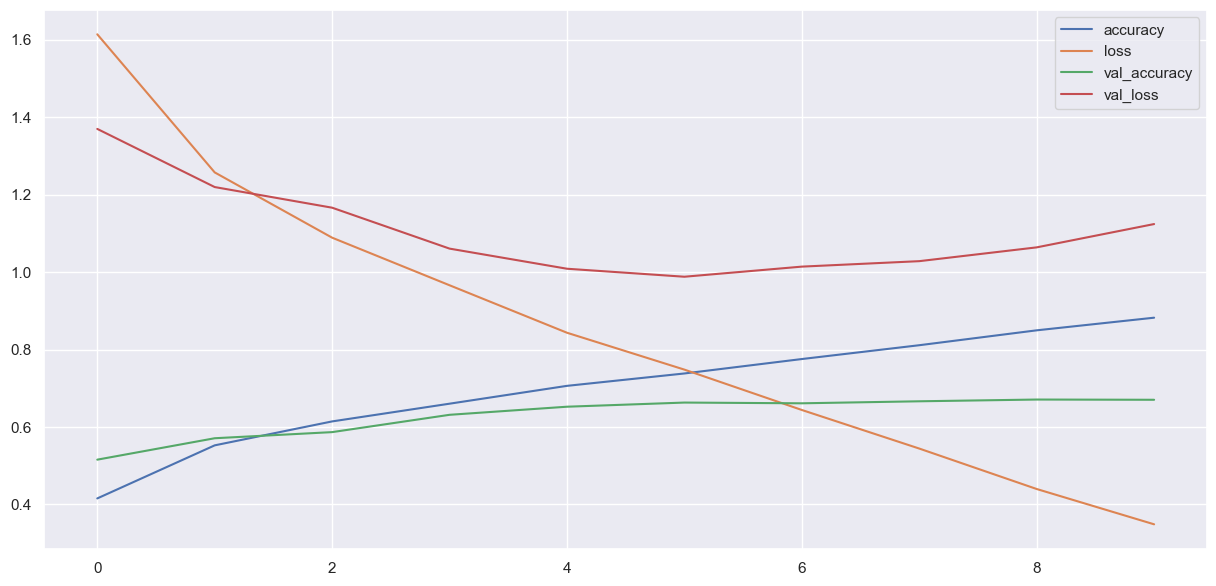

In [50]:
# Model training history parameters
result=pd.DataFrame(model.history.history)
# visualising the training history
result.plot()

### Step 7- Prediction on Test Data

In [51]:
# prediction on test data
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [52]:
# print the predicted values
y_pred

array([[4.7541984e-05, 1.1111419e-03, 3.7856793e-04, ..., 6.5885769e-04,
        1.9418434e-03, 2.3461992e-04],
       [2.2326726e-02, 5.2513510e-01, 9.9674116e-07, ..., 2.6004896e-09,
        4.5206571e-01, 4.6951277e-04],
       [4.3888927e-01, 2.1311073e-01, 7.1423443e-04, ..., 8.4522525e-03,
        3.2243082e-01, 1.3444052e-02],
       ...,
       [2.6201253e-04, 1.0813838e-07, 6.8491328e-01, ..., 1.1457358e-04,
        6.6225760e-04, 2.2599083e-06],
       [5.5578455e-02, 4.8709664e-02, 1.8250144e-03, ..., 2.9112893e-04,
        1.6354299e-05, 3.6776913e-04],
       [3.0331620e-08, 2.8134227e-06, 2.9026905e-05, ..., 6.6065848e-01,
        1.1812851e-08, 6.0012559e-07]], dtype=float32)

In [53]:
# getting predicted labels  for all the test samples
final_y_predicted=np.argmax(y_pred,axis=1)
final_y_predicted
'''
In the CIFAR-10 dataset, each image is associated with a numeric label that corresponds to a specific class. 
Here is the mapping between the numeric labels and the class names:

0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck
'''

'\nIn the CIFAR-10 dataset, each image is associated with a numeric label that corresponds to a specific class. \nHere is the mapping between the numeric labels and the class names:\n\n0: Airplane\n1: Automobile\n2: Bird\n3: Cat\n4: Deer\n5: Dog\n6: Frog\n7: Horse\n8: Ship\n9: Truck\n'

In [54]:
# Evaluate
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, final_y_predicted)
cm

array([[785,  13,  47,  29,  13,  11,  21,  15,  31,  35],
       [ 35, 744,  12,  11,   5,  13,  24,   5,  19, 132],
       [ 73,   5, 489,  76, 104,  74, 123,  39,   5,  12],
       [ 20,   8,  76, 418,  80, 203, 145,  30,   6,  14],
       [ 13,   4,  74,  64, 631,  40, 105,  60,   6,   3],
       [ 13,   2,  50, 161,  64, 602,  63,  37,   3,   5],
       [  6,   3,  35,  34,  33,  31, 849,   4,   1,   4],
       [ 15,   4,  39,  40,  75,  80,  18, 719,   0,  10],
       [124,  49,  19,  18,  18,  16,  22,   1, 690,  43],
       [ 49,  90,  10,  20,   8,  12,  24,  31,  21, 735]], dtype=int64)

[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

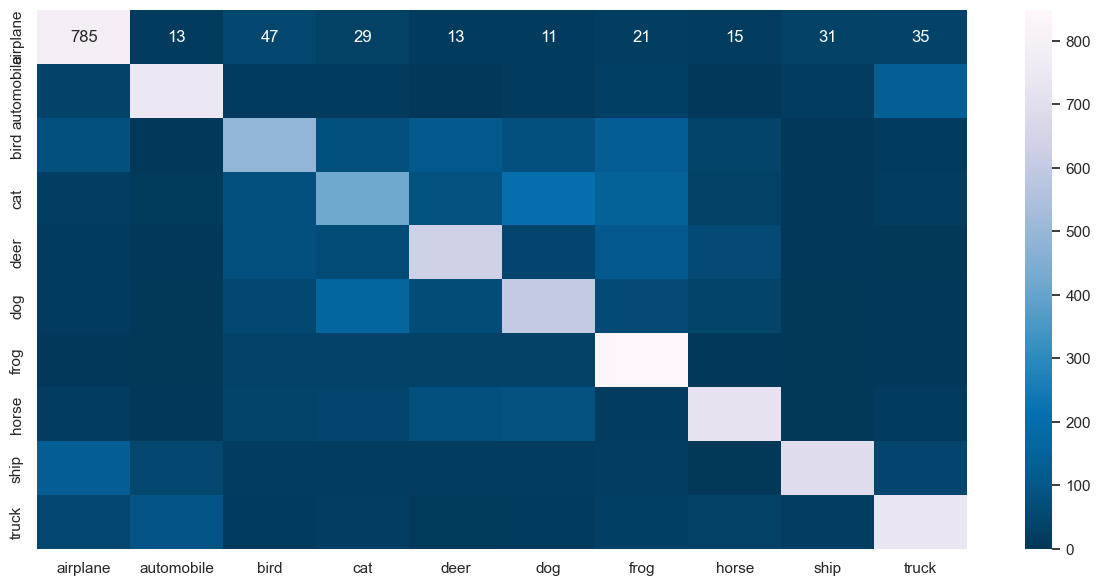

In [55]:
# confusion matrix using seaborn
import seaborn as sns
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.set(rc={'figure.figsize':(15,7)})
c=sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

In [56]:
# print classwise precision recall f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test,final_y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.81      0.74      0.77      1000
           2       0.57      0.49      0.53      1000
           3       0.48      0.42      0.45      1000
           4       0.61      0.63      0.62      1000
           5       0.56      0.60      0.58      1000
           6       0.61      0.85      0.71      1000
           7       0.76      0.72      0.74      1000
           8       0.88      0.69      0.77      1000
           9       0.74      0.73      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000

